In [16]:
# import required modules, packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

# import datasets, classifiers, performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [4]:
# accessing the dataset (method 2 using PIL)

from PIL import Image, ImageOps

p = Path("sample_Signature/")
dirs = p.glob("*")
labels_dict = {'forge':0, 'genuin':1}

image_data = []
labels = []

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]

    for img_path in folder_dir.glob("*.png"):
        # reading/opens each image
        img = Image.open(img_path)
        if 'L' in img.getbands():  # image is black-and-white, colorize it
            img = ImageOps.colorize(img, black="blue", white="white")
        # resizing each image
        img_new = img.resize((200,200))
        # convert each image to array using numpy
        img_array = np.asarray(img_new)
        # append each image array to image_data list
        image_data.append(img_array)
        # match the label to corresponding image
        labels.append(labels_dict[label])

In [5]:
print(len(image_data))
print(len(labels))

300
300


In [6]:
image_data = np.array(image_data, dtype = 'float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(300, 200, 200, 3) (300,)


In [7]:
import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

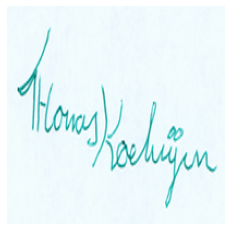

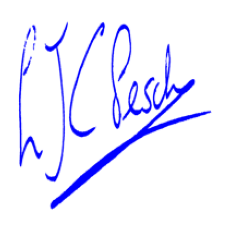

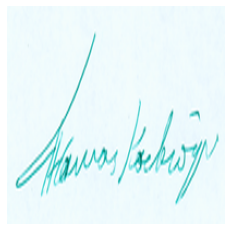

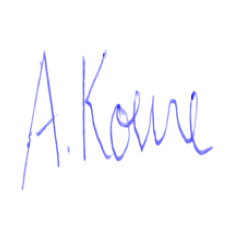

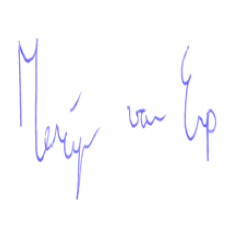

In [8]:
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

# 10 example visualizations
for i in range(5):
    drawImg(image_data[i])

In [9]:
# to use a classifier, first need to flatten images, convert to grayscale

# flatten images
n_samples = len(image_data)
data = image_data.reshape((n_samples, -1))

# create a classifier: support vector classifier
clf = svm.SVC(gamma = 0.001)

# split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size =0.5, shuffle = False)

# learn the signatures on the train subset
clf.fit(X_train, y_train)

# predict the signature (forge or real) on the test subset
predicted = clf.predict(X_test)

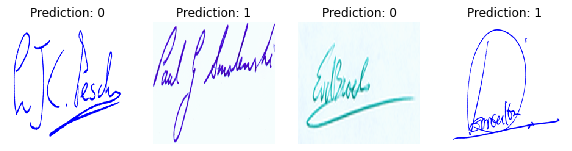

In [13]:
# take samples to predict and visualize
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(200, 200, 3)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [14]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.45      0.44      0.45        68
           1       0.55      0.56      0.55        82

    accuracy                           0.51       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.51      0.51      0.51       150




In [24]:
X_train.shape

(150, 120000)

In [32]:
X_train[0]

array([0.9490196 , 0.9882353 , 0.99215686, ..., 0.9490196 , 0.9882353 ,
       0.99215686], dtype=float32)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(2,input_shape=(120000,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train, epochs = 10)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 52.3351 - accuracy: 0.4333
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 26.2365 - accuracy: 0.5200
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 23.2350 - accuracy: 0.4267
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 6.8236 - accuracy: 0.5333
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 7.0299 - accuracy: 0.5333
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 16.9558 - accuracy: 0.4667
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 20.7469 - accuracy: 0.4800
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 24.8864 - accuracy: 0.5200
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 23.7226 - accuracy: 0.4533
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 11.1941 - accuracy: 0.6200


In [34]:
model.evaluate (X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 14.3057 - accuracy: 0.5467


[14.305703163146973, 0.54666668176651]

In [35]:
import joblib
joblib.dump(clf, 'model.pkl')

['model.pkl']

In [36]:
lr = joblib.load('model.pkl')